In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")


In [11]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("electricity_data.csv")

# Show first 5 rows
df.head()


,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity
0,2007-01-01 00:00:00,1.2,0.1,234.0,5.0
1,2007-01-01 01:00:00,1.5,0.2,233.5,6.2
2,2007-01-01 02:00:00,1.1,0.1,234.2,4.8
3,2007-01-01 03:00:00,1.3,0.2,233.8,5.6
4,2007-01-01 04:00:00,1.6,0.2,234.1,6.7


In [13]:
# Replace any missing values marked with '?' and drop NaNs
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

# Convert data types
df['Global_active_power'] = df['Global_active_power'].astype(float)

# Show dataset info
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   10 non-null     object 
 1   Global_active_power    10 non-null     float64
 2   Global_reactive_power  10 non-null     float64
 3   Voltage                10 non-null     float64
 4   Global_intensity       10 non-null     float64
dtypes: float64(4), object(1)
memory usage: 532.0+ bytes


In [21]:
# Convert 'Date' to datetime format (auto format detection)
df['Datetime'] = pd.to_datetime(df['Date'])

# Set Datetime as the index
df.set_index('Datetime', inplace=True)

# Drop the original 'Date' column
df.drop(columns=['Date'], inplace=True)

# Preview cleaned data
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Datetime,,,,
2007-01-01 00:00:00,1.2,0.1,234.0,5.0
2007-01-01 01:00:00,1.5,0.2,233.5,6.2
2007-01-01 02:00:00,1.1,0.1,234.2,4.8
2007-01-01 03:00:00,1.3,0.2,233.8,5.6
2007-01-01 04:00:00,1.6,0.2,234.1,6.7


In [17]:
df.columns


Index(['Date', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity'],
      dtype='object')

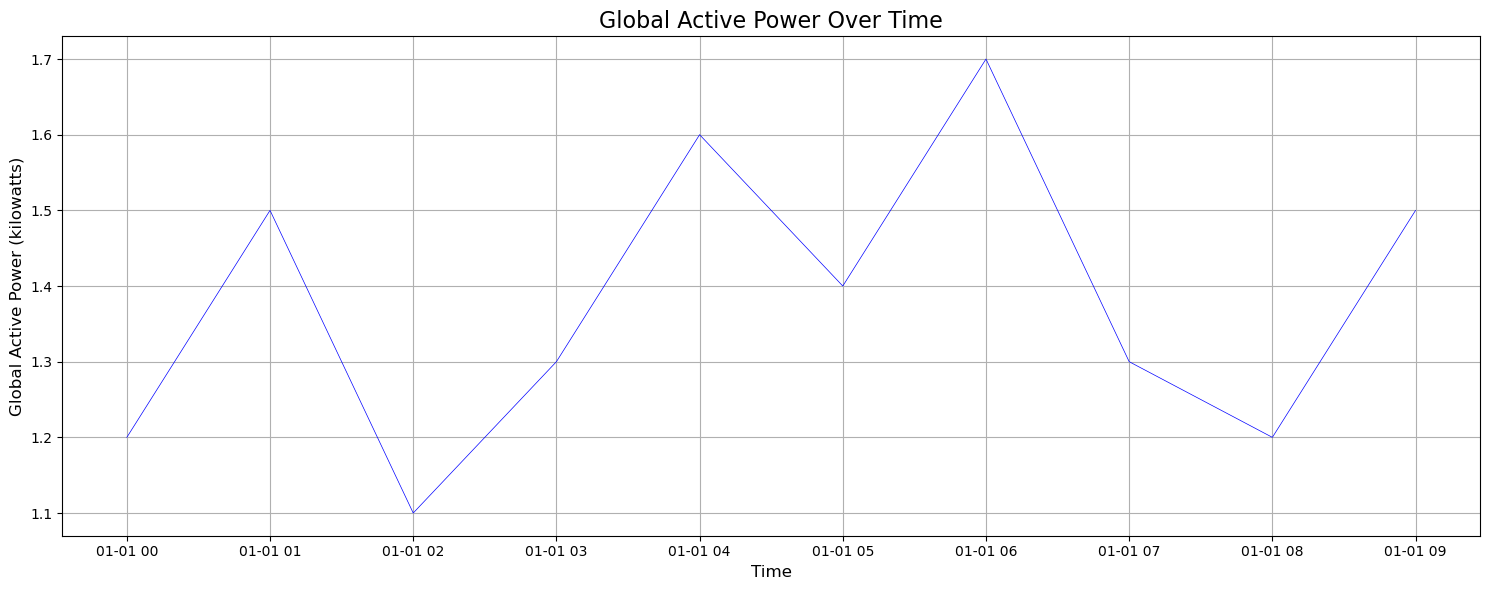

In [23]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(15, 6))

# Plot Global Active Power over time
plt.plot(df.index, df['Global_active_power'], color='blue', linewidth=0.5)

# Add labels and title
plt.title('Global Active Power Over Time', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Global Active Power (kilowatts)', fontsize=12)
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


In [25]:
# Extract time-based features
df['Hour'] = df.index.hour
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Weekday'] = df.index.weekday  # 0 = Monday, 6 = Sunday
df['Year'] = df.index.year


In [27]:
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Hour,Day,Month,Weekday,Year
Datetime,,,,,,,,,
2007-01-01 00:00:00,1.2,0.1,234.0,5.0,0,1,1,0,2007
2007-01-01 01:00:00,1.5,0.2,233.5,6.2,1,1,1,0,2007
2007-01-01 02:00:00,1.1,0.1,234.2,4.8,2,1,1,0,2007
2007-01-01 03:00:00,1.3,0.2,233.8,5.6,3,1,1,0,2007
2007-01-01 04:00:00,1.6,0.2,234.1,6.7,4,1,1,0,2007


In [29]:
# Step 1: Drop rows with missing values (if any)
df.dropna(inplace=True)

# Step 2: Define Features (X) and Target (y)
X = df[['Hour', 'Day', 'Month', 'Weekday', 'Year', 'Voltage', 'Global_reactive_power', 'Global_intensity']]
y = df['Global_active_power']


In [31]:
from sklearn.model_selection import train_test_split

# 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [33]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on training data
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [35]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Show first 5 predictions for a quick look
print("🔮 First 5 Predictions:")
print(y_pred[:5])


🔮 First 5 Predictions:
[1.291 1.467]


In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("📊 Model Performance:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.3f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.3f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.3f}")


📊 Model Performance:
🔹 Mean Absolute Error (MAE): 0.062
🔹 Mean Squared Error (MSE): 0.005
🔹 Root Mean Squared Error (RMSE): 0.068


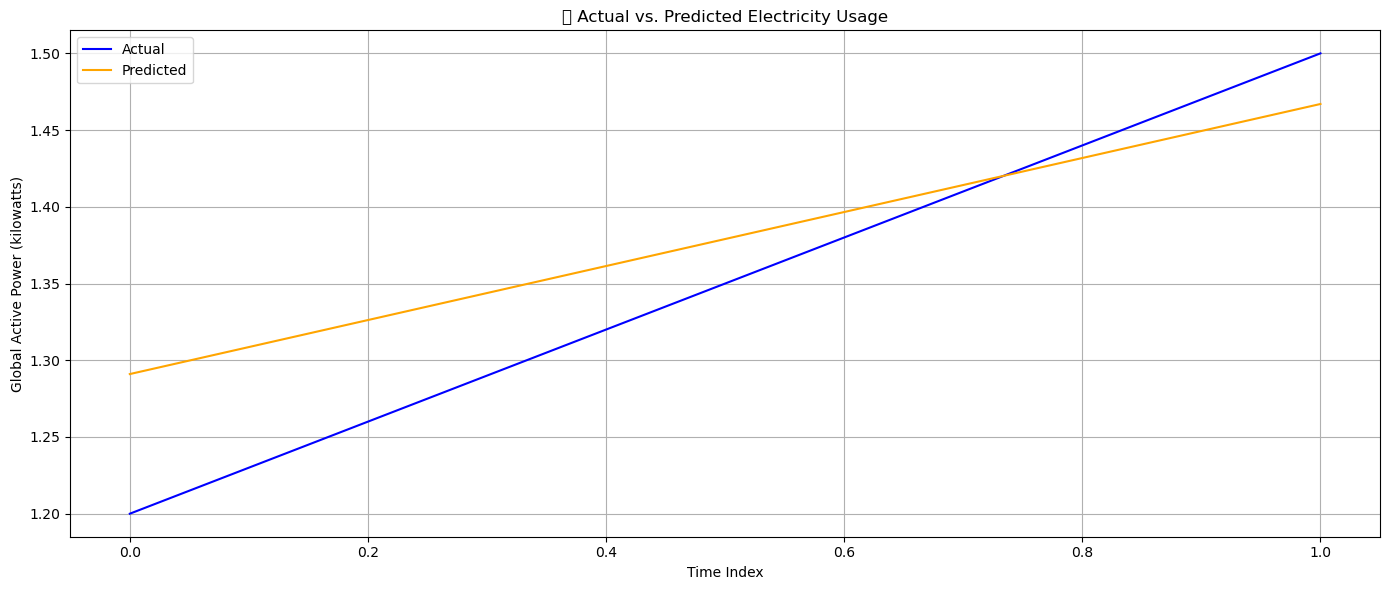

In [39]:
import matplotlib.pyplot as plt

# Create a DataFrame to compare
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison = comparison.reset_index(drop=True)

# Plot
plt.figure(figsize=(14, 6))
plt.plot(comparison['Actual'], label='Actual', color='blue')
plt.plot(comparison['Predicted'], label='Predicted', color='orange')
plt.title('📊 Actual vs. Predicted Electricity Usage')
plt.xlabel('Time Index')
plt.ylabel('Global Active Power (kilowatts)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [41]:
import joblib

# Save the model to a file
joblib.dump(model, 'electricity_consumption_model.pkl')

print("✅ Model saved as 'electricity_consumption_model.pkl'")


✅ Model saved as 'electricity_consumption_model.pkl'


In [45]:
import joblib
import numpy as np

# Load the model
model = joblib.load("electricity_consumption_model.pkl")

# Provide all 8 features in correct order
# Example: [Global_reactive_power, Voltage, Global_intensity, Sub_metering_1, Sub_metering_2, Sub_metering_3, Weekday, Hour]
new_data = np.array([[0.2, 240.0, 4.5, 1.0, 0.0, 2.0, 2, 18]])  # Mon (2), 6PM

# Predict
predicted = model.predict(new_data)
print(f"⚡ Predicted Global Active Power Consumption: {predicted[0]:.4f} kilowatts")


⚡ Predicted Global Active Power Consumption: 1.5380 kilowatts


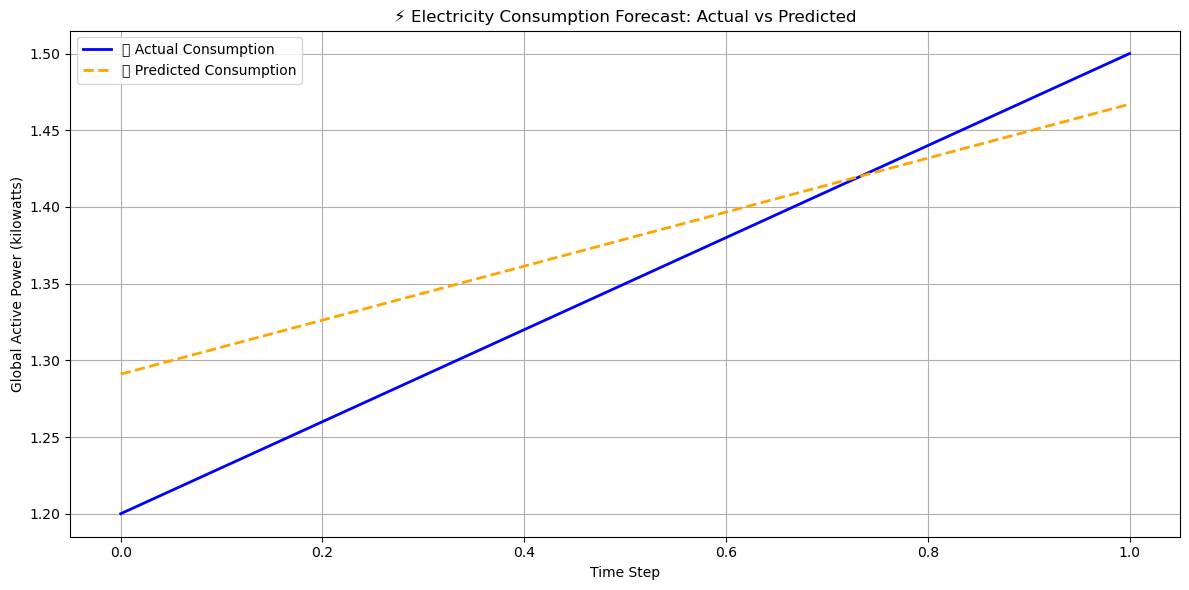

In [47]:
import matplotlib.pyplot as plt

# Predict values for the test set
y_pred = model.predict(X_test)

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:100], label='📈 Actual Consumption', color='blue', linewidth=2)
plt.plot(y_pred[:100], label='🔮 Predicted Consumption', color='orange', linestyle='--', linewidth=2)
plt.title("⚡ Electricity Consumption Forecast: Actual vs Predicted")
plt.xlabel("Time Step")
plt.ylabel("Global Active Power (kilowatts)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [49]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    "Actual Consumption (kilowatts)": y_test.values,
    "Predicted Consumption (kilowatts)": y_pred
})

# Save to CSV
results_df.to_csv("electricity_consumption_predictions.csv", index=False)

print("✅ Results exported to 'electricity_consumption_predictions.csv'")


✅ Results exported to 'electricity_consumption_predictions.csv'
